# Data_Cleaning

In [59]:
import pandas as pd
import numpy as np

In [254]:
data = pd.read_csv('data/data.csv')

** id ** -Does not contain any information about the house and not needed for linking with any other tables. Will drop.

In [255]:
data.drop('id', axis=1, inplace=True)

## Null Values

**waterfront** -I reckon they'd've mentioned if a property were on the waterfront. Will replace null values with 0.0

In [256]:
data.waterfront.fillna(0.0, inplace=True)
data.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

**view** -similarly I'll replace null with 0.0

In [257]:
data.view.fillna(0.0, inplace=True)
data.view.value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

**yr_renovated** - will replace null and 0.0 values with yr_built. Tempted to drop the column as only 744 entries will be different from yr_built, but first will see which has the better relationship with price.

In [258]:
data.yr_renovated.fillna(data.yr_built, inplace=True)
data.yr_renovated.replace(0, data.yr_built, inplace=True)

## Unusual / Placeholder Values

**date** -Change type to datetime

In [259]:
data.date = pd.to_datetime(data.date)

In [260]:
data.bedrooms.value_counts()
data[data.bedrooms == 33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,1947.0,98103,47.6878,-122.331,1330,4700


In [261]:
data[data.bedrooms == 3].describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,9.824000e+03,9824.0,9824.000000,9824.000000,9824.000000,9824.000000,9824.000000,9824.000000,9824.000000,9824.000000,9824.000000,9824.000000,9824.000000,9824.000000,9824.000000,9824.000000,9824.000000,9824.000000
mean,4.662766e+05,3.0,1.968394,1805.837235,14414.790208,1.449410,0.005497,0.187704,3.415513,7.472516,1584.442284,1971.812602,1973.522394,98076.478217,47.551478,-122.213344,1835.443506,12809.343648
std,2.626207e+05,0.0,0.629864,623.118916,35652.545246,0.561893,0.073940,0.685199,0.640348,0.949856,573.570701,27.222798,26.790645,53.724672,0.146264,0.144433,541.362922,27249.179317
min,8.200000e+04,3.0,0.750000,490.000000,572.000000,1.000000,0.000000,0.000000,1.000000,4.000000,490.000000,1900.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.954875e+05,3.0,1.500000,1370.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,1955.000000,1956.000000,98031.000000,47.444275,-122.331000,1450.000000,5001.000000
50%,4.130000e+05,3.0,2.000000,1680.000000,7629.500000,1.000000,0.000000,0.000000,3.000000,7.000000,1440.000000,1976.000000,1977.000000,98059.000000,47.565050,-122.231000,1720.000000,7688.500000
75%,5.600000e+05,3.0,2.500000,2110.000000,10364.000000,2.000000,0.000000,0.000000,4.000000,8.000000,1830.000000,1993.000000,1994.000000,98117.000000,47.680000,-122.125000,2130.000000,9998.000000
max,3.800000e+06,3.0,4.500000,6400.000000,843309.000000,3.500000,1.000000,4.000000,5.000000,13.000000,5480.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,4950.000000,560617.000000


**bedrooms** -The 33 bedroom property is slightly smaller than the average 3 bedroom property (within a standard deviation). I suspect 33 was a typo and will change it to 3

In [262]:
data.at[15856, 'bedrooms'] = 3

**sqft_basement** -replace question marks with zero  and change column to type: int

In [263]:
data.sqft_basement.replace('?', 0, inplace=True)
data.sqft_basement = data.sqft_basement.astype('float64', copy=False).astype('int64', copy=False)

## Removing Outliers

In [264]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.371811,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,1972.945131,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.904096,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,28.945393,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,1954.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,1977.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,1999.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Using mean +/- 2(stdev) for the columns : price, bedrooms, sqft_living, sqft_lot, sqft_above.

In [265]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [266]:
# # To reset
# data = data_before_std

In [267]:
data_before_std = data

columns = ['price', 'bedrooms', 'sqft_living', 'sqft_lot']
for col in columns:
    mean = data[col].mean()
    std = data[col].std()
    
    data = data[abs(data[col] - mean) <= (2 * std)]        

In [268]:
data_before_std.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.371811,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,285.716581,1970.999676,1972.945131,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,3.673681e+05,0.904096,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,439.819830,29.375234,28.945393,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,1954.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,1977.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,1999.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [269]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.904900e+04,19049.000000,19049.000000,19049.000000,19049.000000,19049.000000,19049.000000,19049.000000,19049.000000,19049.000000,19049.000000,19049.000000,19049.000000,19049.000000,19049.000000,19049.000000,19049.000000,19049.000000,19049.000000
mean,4.694958e+05,3.287469,2.009804,1897.426427,9510.055698,1.466770,0.002835,0.161163,3.418237,7.481338,1643.564807,248.943567,1970.172083,1971.924878,98079.674156,47.558282,-122.220217,1881.418972,9357.078324
std,2.087372e+05,0.778822,0.661655,658.989169,9695.817328,0.538738,0.053169,0.622922,0.650933,0.965262,636.062676,381.441598,29.175899,28.810199,53.731797,0.140295,0.137887,568.933030,12290.052769
min,7.800000e+04,2.000000,0.500000,440.000000,520.000000,1.000000,0.000000,0.000000,1.000000,4.000000,440.000000,0.000000,1900.000000,1900.000000,98001.000000,47.155900,-122.512000,399.000000,651.000000
25%,3.100000e+05,3.000000,1.500000,1390.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,1951.000000,1953.000000,98033.000000,47.463300,-122.332000,1460.000000,5000.000000
50%,4.299500e+05,3.000000,2.000000,1820.000000,7350.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1490.000000,0.000000,1973.000000,1976.000000,98072.000000,47.568600,-122.246000,1780.000000,7440.000000
75%,5.870000e+05,4.000000,2.500000,2350.000000,9888.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2010.000000,500.000000,1995.000000,1997.000000,98118.000000,47.680200,-122.135000,2230.000000,9600.000000
max,1.270000e+06,5.000000,4.500000,3555.000000,85377.000000,3.500000,1.000000,4.000000,5.000000,11.000000,3555.000000,1990.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,4950.000000,380279.000000


### Extra cleaning for dummying

In [41]:
data['bathroomsx4'] = data.bathrooms*4
data.bathroomsx4 = data.bathroomsx4.astype('int32')
data.drop('bathrooms', axis=1, inplace=True)

In [42]:
set(data.floors)

{1.0, 1.5, 2.0, 2.5, 3.0, 3.5}

In [43]:
data['floorsx2'] = data.floors*2
data.floorsx2 = data.floorsx2.astype('int32')
data.drop('floors', axis=1, inplace=True)

In [44]:
data = data.astype({'view':'int32','waterfront':'int32','yr_renovated':'int32'})

In [45]:
set(data.view)

{0, 1, 2, 3, 4}

In [46]:
data

,date,price,bedrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,bathroomsx4,floorsx2
0,2014-10-13,221900.0,3,1180,5650,0,0,3,7,1180,0,1955,1955,98178,47.5112,-122.257,1340,5650,4,2
1,2014-12-09,538000.0,3,2570,7242,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,9,4
2,2015-02-25,180000.0,2,770,10000,0,0,3,6,770,0,1933,1933,98028,47.7379,-122.233,2720,8062,4,2
3,2014-12-09,604000.0,4,1960,5000,0,0,5,7,1050,910,1965,1965,98136,47.5208,-122.393,1360,5000,12,2
4,2015-02-18,510000.0,3,1680,8080,0,0,3,8,1680,0,1987,1987,98074,47.6168,-122.045,1800,7503,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,1530,1131,0,0,3,8,1530,0,2009,2009,98103,47.6993,-122.346,1530,1509,10,6
21593,2015-02-23,400000.0,4,2310,5813,0,0,3,8,2310,0,2014,2014,98146,47.5107,-122.362,1830,7200,10,4
21594,2014-06-23,402101.0,2,1020,1350,0,0,3,7,1020,0,2009,2009,98144,47.5944,-122.299,1020,2007,3,4
21595,2015-01-16,400000.0,3,1600,2388,0,0,3,8,1600,0,2004,2004,98027,47.5345,-122.069,1410,1287,10,4


In [47]:
d_in = data.drop(set(list(ind[0])))
d_in.to_csv('data\clean.csv', index=False)

# Data Analysis

In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


import warnings
warnings.filterwarnings('ignore')

## Business Problem: Who are our clients, and what insignts do they need?
- Constructors: If it costs around the same money to build a feature, what feature gives the highest return on investment (ROI)? (Might need to do some outside research, but can be interesting)
- Resellers: It would be best to buy a house at a low price and sell at a higher price. So when they are looking for houses to invest in, our model can tell if a house is overpriced or underpriced.

- With the idea about making a visualization on a map - I was thinking it might be cool if we use a contour?

## More Data - GIS

In [4]:
gis = pd.read_csv('data/Parcels_for_King_County.csv')

In [5]:
gis.head()

,OBJECTID,SITETYPE,ZIP5,LAT,LON
0,1,R1,98107.0,47.656113,-122.358053
1,2,R1,98107.0,47.656114,-122.357894
2,3,R1,98107.0,47.656114,-122.357731
3,4,R1,98107.0,47.656015,-122.357475
4,5,R1,98107.0,47.656118,-122.357473


In [6]:
gis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623704 entries, 0 to 623703
Data columns (total 5 columns):
OBJECTID    623704 non-null int64
SITETYPE    563790 non-null object
ZIP5        563790 non-null float64
LAT         563790 non-null float64
LON         563790 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 23.8+ MB


## More Data Cleaning and EDA

It looks like 'sqft_living' = 'sqft_above' + 'sqft_basement'.
Will remove 'sqft_living' to aviod multicolinearity (perfect multicolinearlity).

In [7]:
data.drop('sqft_living', axis=1, inplace=True)

converted some columns as int types for aesthetic purposes.

In [8]:
data.price = data.price.astype('int')
data.sqft_basement = data.sqft_basement.astype('int')
data.yr_renovated = data.yr_renovated.astype('int')

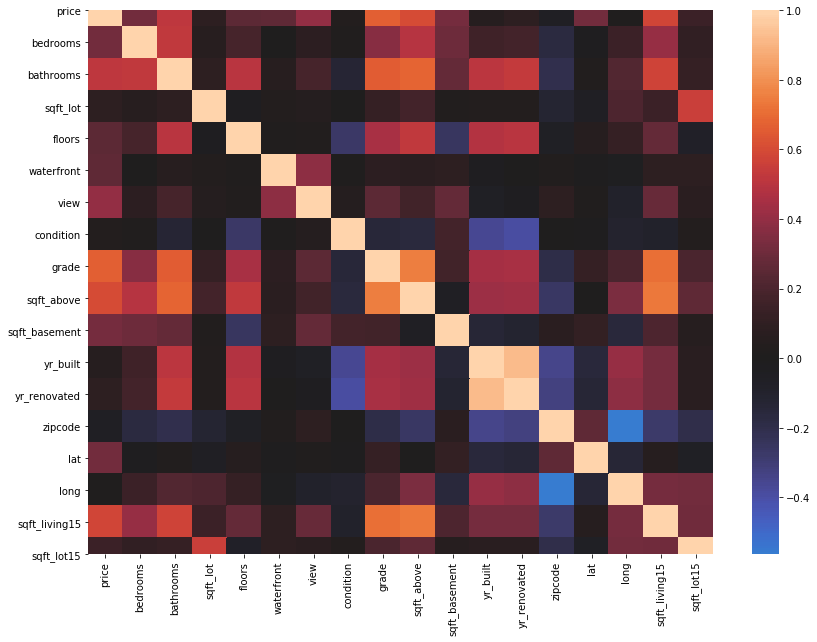

In [9]:
# Heatmap to visualize correlations between variables - refer to table in next cell if this is hard to see.
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), center=0);

In [10]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

In [11]:
df[(df.cc>.75) & (df.cc <1)]
# Variable pairs to be careful about! (again, multicolinearity)

,cc
pairs,
"(yr_renovated, yr_built)",0.926466
"(yr_built, yr_renovated)",0.926466
"(sqft_above, grade)",0.754818
"(grade, sqft_above)",0.754818


### Uncertainty in data:
- I don't know what the 'date' represents - possibly the date that this particular datapoint was recorded?
- Also not sure what the last two columns 'sqft_living15' and 'sqft_lot15' represent.
- What exactly is a quater or half bathrooms? (same question with floors)

In [12]:
data.head()

,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-10-13,221900,3,1.00,5650,1.0,0.0,0.0,3,7,1180,0,1955,1955,98178,47.5112,-122.257,1340,5650
1,2014-12-09,538000,3,2.25,7242,2.0,0.0,0.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2015-02-25,180000,2,1.00,10000,1.0,0.0,0.0,3,6,770,0,1933,1933,98028,47.7379,-122.233,2720,8062
3,2014-12-09,604000,4,3.00,5000,1.0,0.0,0.0,5,7,1050,910,1965,1965,98136,47.5208,-122.393,1360,5000
4,2015-02-18,510000,3,2.00,8080,1.0,0.0,0.0,3,8,1680,0,1987,1987,98074,47.6168,-122.045,1800,7503


## Finding Correlations and making indexes

In [271]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [272]:
data_before_drop = data

In [273]:
data.drop(['sqft_living15', 'sqft_lot15', 'lat', 'long'], axis=1, inplace=True)

3    470
4     85
5     22
2      2
Name: condition, dtype: int64

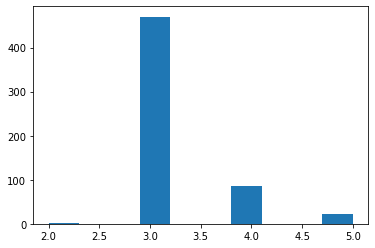

In [274]:
renovated = data[data.yr_built != data.yr_renovated]
plt.hist('condition', data=renovated)
renovated.condition.value_counts()

(array([  1.,   3.,   0.,  66.,   0., 250., 189.,   0.,  62.,   8.]),
 array([ 4. ,  4.6,  5.2,  5.8,  6.4,  7. ,  7.6,  8.2,  8.8,  9.4, 10. ]),
 <a list of 10 Patch objects>)

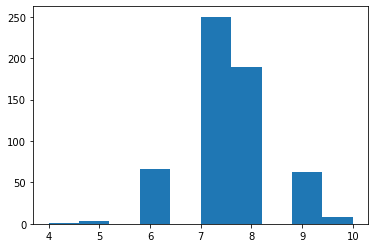

In [138]:
plt.hist('grade', data=renovated)

In [137]:
diff_years = renovated.yr_built - renovated.yr_renovated
diff_years.abs().describe()


count    579.000000
mean      57.666667
std       23.904896
min        9.000000
25%       39.000000
50%       56.000000
75%       75.500000
max      114.000000
dtype: float64

Because the data in 'yr_renovated' will be reflected in 'grade' and 'condition' - will omit this column.

In [235]:
# # reset
# data = data_with_yr_renovated

In [275]:
data_with_yr_renovated = data
data.drop('yr_renovated', axis=1, inplace=True)

omit 'sqft_living', since it is in perfect multicolinearity with 'sqft_above' and 'sqft_basement'.

In [276]:
data.drop('sqft_living', axis=1, inplace=True)

In [277]:
data.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
count,1.904900e+04,19049.000000,19049.000000,19049.000000,19049.000000,19049.000000,19049.000000,19049.000000,19049.000000,19049.000000,19049.000000,19049.000000,19049.000000
mean,4.694958e+05,3.287469,2.009804,9510.055698,1.466770,0.002835,0.161163,3.418237,7.481338,1643.564807,248.943567,1970.172083,98079.674156
std,2.087372e+05,0.778822,0.661655,9695.817328,0.538738,0.053169,0.622922,0.650933,0.965262,636.062676,381.441598,29.175899,53.731797
min,7.800000e+04,2.000000,0.500000,520.000000,1.000000,0.000000,0.000000,1.000000,4.000000,440.000000,0.000000,1900.000000,98001.000000
25%,3.100000e+05,3.000000,1.500000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,1951.000000,98033.000000
50%,4.299500e+05,3.000000,2.000000,7350.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1490.000000,0.000000,1973.000000,98072.000000
75%,5.870000e+05,4.000000,2.500000,9888.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2010.000000,500.000000,1995.000000,98118.000000
max,1.270000e+06,5.000000,4.500000,85377.000000,3.500000,1.000000,4.000000,5.000000,11.000000,3555.000000,1990.000000,2015.000000,98199.000000


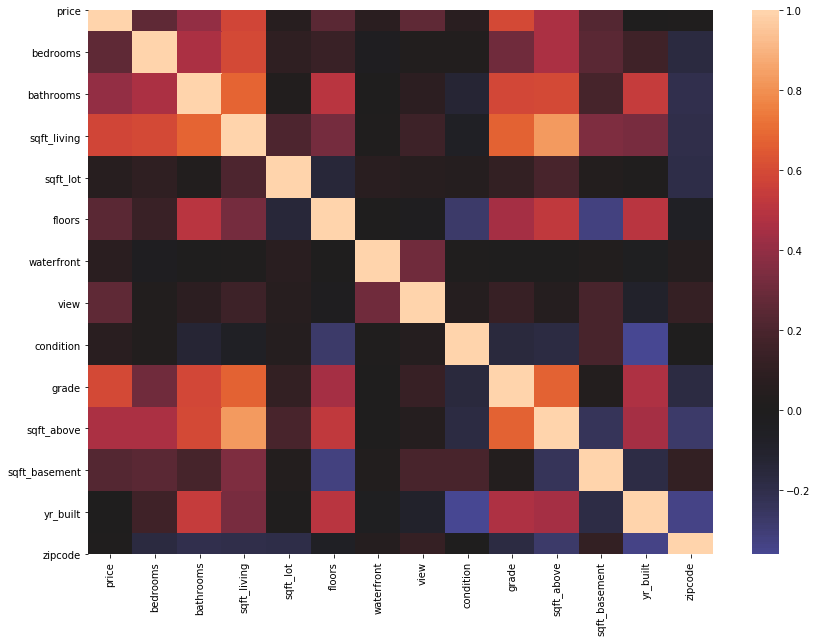

In [152]:
# Heatmap to visualize correlations between variables - refer to table in next cell if this is hard to see.
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), center=0);

In [153]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

df=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#drop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

In [157]:
df[(df.cc>.75) & (df.cc <1)]
# Variable pairs to be careful about! (again, multicolinearity)

,cc
pairs,
"(sqft_living, sqft_above)",0.825066
"(sqft_above, sqft_living)",0.825066


In [122]:
data.sqft_basement.describe()

count    19049.000000
mean       248.943567
std        381.441598
min          0.000000
25%          0.000000
50%          0.000000
75%        500.000000
max       1990.000000
Name: sqft_basement, dtype: float64

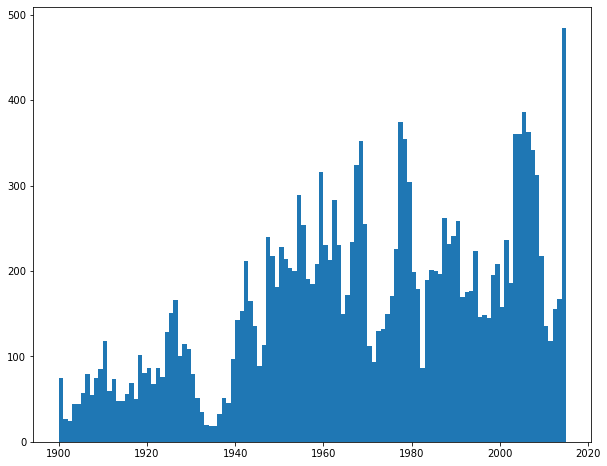

In [160]:
plt.figure(figsize=(10, 8))

plt.hist(data.yr_built, bins=2015-1900)
plt.show()

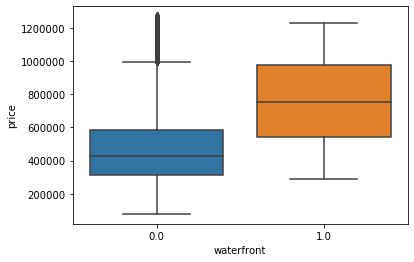

In [124]:
sns.boxplot(x="waterfront", y="price", data=data)

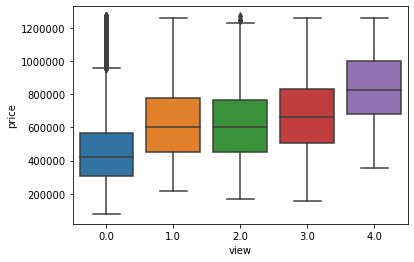

In [125]:
sns.boxplot(x="view", y="price", data=data)

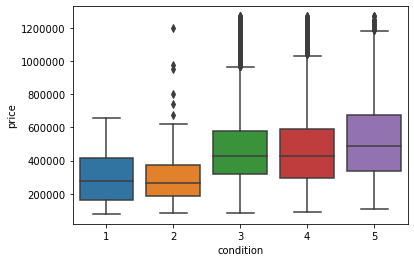

In [126]:
sns.boxplot(x="condition", y="price", data=data)

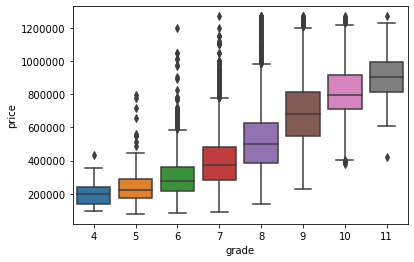

In [127]:
sns.boxplot(x="grade", y="price", data=data)

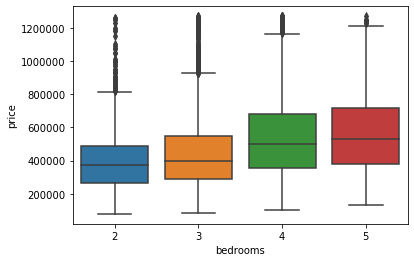

In [128]:
sns.boxplot(x="bedrooms", y="price", data=data)

also drop 'date', since it won't help with predicting the house prices.

In [278]:
data.drop('date', axis=1, inplace=True)

In [279]:
data.columns
# 1 dependent variable, 12 independent variables.

Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'zipcode'],
      dtype='object')

In [280]:
data

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
0,221900.0,3,1.00,5650,1.0,0.0,0.0,3,7,1180,0,1955,98178
1,538000.0,3,2.25,7242,2.0,0.0,0.0,3,7,2170,400,1951,98125
2,180000.0,2,1.00,10000,1.0,0.0,0.0,3,6,770,0,1933,98028
3,604000.0,4,3.00,5000,1.0,0.0,0.0,5,7,1050,910,1965,98136
4,510000.0,3,2.00,8080,1.0,0.0,0.0,3,8,1680,0,1987,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,3.0,0.0,0.0,3,8,1530,0,2009,98103
21593,400000.0,4,2.50,5813,2.0,0.0,0.0,3,8,2310,0,2014,98146
21594,402101.0,2,0.75,1350,2.0,0.0,0.0,3,7,1020,0,2009,98144
21595,400000.0,3,2.50,2388,2.0,0.0,0.0,3,8,1600,0,2004,98027


In [281]:
data_before_dummies = data
data_before_dummies

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
0,221900.0,3,1.00,5650,1.0,0.0,0.0,3,7,1180,0,1955,98178
1,538000.0,3,2.25,7242,2.0,0.0,0.0,3,7,2170,400,1951,98125
2,180000.0,2,1.00,10000,1.0,0.0,0.0,3,6,770,0,1933,98028
3,604000.0,4,3.00,5000,1.0,0.0,0.0,5,7,1050,910,1965,98136
4,510000.0,3,2.00,8080,1.0,0.0,0.0,3,8,1680,0,1987,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,3.0,0.0,0.0,3,8,1530,0,2009,98103
21593,400000.0,4,2.50,5813,2.0,0.0,0.0,3,8,2310,0,2014,98146
21594,402101.0,2,0.75,1350,2.0,0.0,0.0,3,7,1020,0,2009,98144
21595,400000.0,3,2.50,2388,2.0,0.0,0.0,3,8,1600,0,2004,98027


In [282]:
waterfront_dummies = pd.get_dummies(data['waterfront'], prefix='water', drop_first=True)
zipcode_dummies = pd.get_dummies(data['zipcode'], prefix='zip', drop_first=True)

In [284]:
data = data.drop(['waterfront', 'zipcode'], axis=1)

In [285]:
data = pd.concat([data, waterfront_dummies, zipcode_dummies], axis=1)

In [286]:
data

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,221900.0,3,1.00,5650,1.0,0.0,3,7,1180,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,7242,2.0,0.0,3,7,2170,400,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,10000,1.0,0.0,3,6,770,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,5000,1.0,0.0,5,7,1050,910,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,8080,1.0,0.0,3,8,1680,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1131,3.0,0.0,3,8,1530,0,...,0,0,0,0,0,0,0,0,0,0
21593,400000.0,4,2.50,5813,2.0,0.0,3,8,2310,0,...,1,0,0,0,0,0,0,0,0,0
21594,402101.0,2,0.75,1350,2.0,0.0,3,7,1020,0,...,0,0,0,0,0,0,0,0,0,0
21595,400000.0,3,2.50,2388,2.0,0.0,3,8,1600,0,...,0,0,0,0,0,0,0,0,0,0


Before doing transformations, perform the train-test split.

In [287]:
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score

In [288]:
outcome = 'price'
x_cols = list(data.columns)
x_cols.remove(outcome)

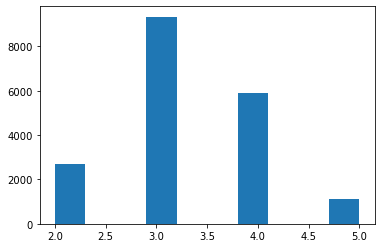

In [167]:
plt.hist('bedrooms', data=data);


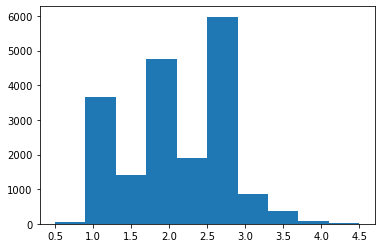

In [168]:
plt.hist('bathrooms', data=data);


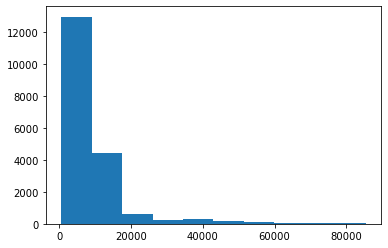

In [169]:
plt.hist('sqft_lot', data=data);
# right skewed - log transform

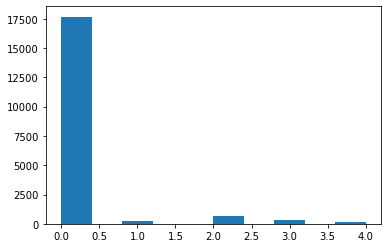

In [173]:
plt.hist('view', data=data);


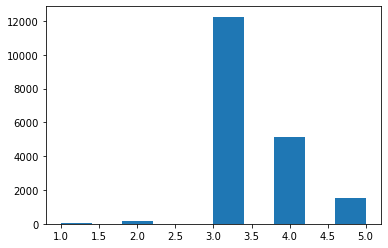

In [174]:
plt.hist('condition', data=data);


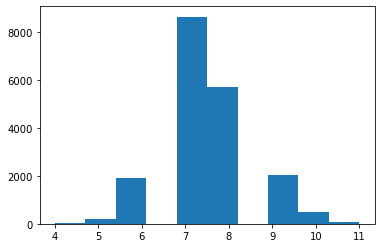

In [175]:
plt.hist('grade', data=data);


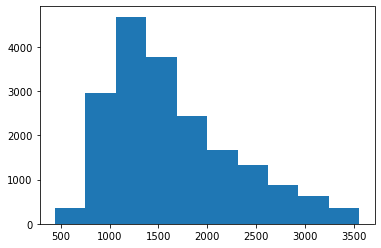

In [176]:
plt.hist('sqft_above', data=data);
# log tranform

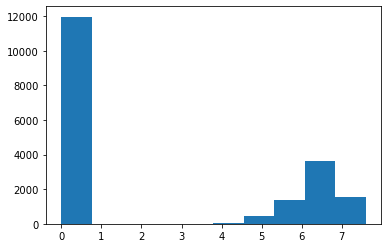

In [202]:
plt.hist('sqft_basement', data=data);
# right skewed, but those datapoints represent houses with no basements.

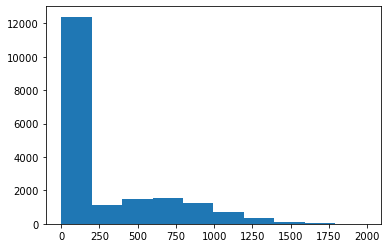

In [216]:
plt.hist('sqft_basement', data=data);
# right skewed, but those datapoints represent houses with no basements.

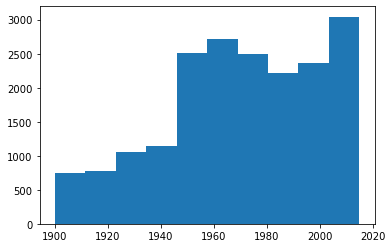

In [178]:
plt.hist('yr_built', data=data);


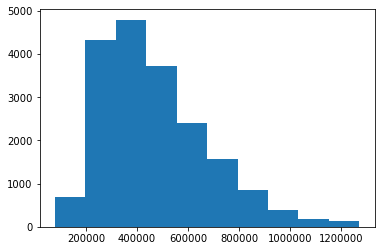

In [221]:
plt.hist('price', data=data);
# log tranform

In [179]:
categoricals = ['waterfront', 'zipcode']
log_transform = ['price', 'sqft_lot', 'sqft_above']
others = ['bedrooms', 'bathrooms', 'floors', 'view', 'condition', 'grade', 'yr_built', 'sqft_basement']

In [234]:
# perform log transform
for feat in log_transform:
    data[feat] = data[feat].map(lambda x: np.log(x))

OverflowError: math range error

In [187]:
# since log(0) is undefined...
data.sqft_basement.value_counts()

-inf         11973
 6.396930      204
 6.214608      200
 6.551080      190
 6.684612      178
             ...  
 6.480045        1
 7.329750        1
 5.686975        1
 7.352441        1
 6.230481        1
Name: sqft_basement, Length: 217, dtype: int64

In [193]:
undefined = data.sqft_basement[0]  # found a undefined row, then assigned that value to a variable.
data.sqft_basement.replace(undefined, 0, inplace=True)  # replace undefined values with zeros.

In [194]:
data.sqft_basement.value_counts()

0.000000    11973
6.396930      204
6.214608      200
6.551080      190
6.684612      178
            ...  
6.480045        1
7.329750        1
5.686975        1
7.352441        1
6.230481        1
Name: sqft_basement, Length: 217, dtype: int64

In [215]:
# data['sqft_basement'] = data['sqft_basement'].map(lambda x: math.log(x, 10))
# np.log()
# np.exp()

# data[feat] = data[feat].map(lambda x: np.log(x))

# data['sqft_basement'] = data['sqft_basement'].map(lambda x: math.exp(x))

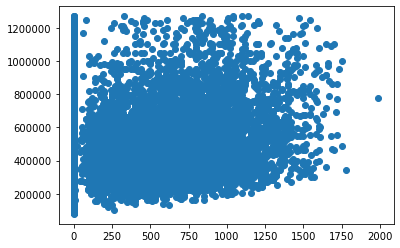

In [219]:
plt.scatter(x='sqft_basement', y='price', data=data);

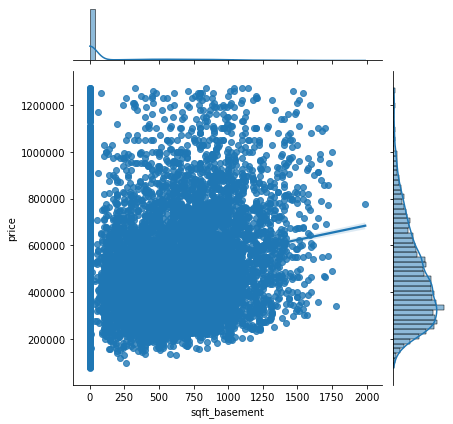

In [220]:
sns.jointplot('sqft_basement','price', data=data, kind='reg');

No strong relationship between price and sqft_basement.

In [226]:
data.sqft_basement.value_counts()

0.0      11973
600.0      204
500.0      200
700.0      190
800.0      178
         ...  
768.0        1
516.0        1
374.0        1
276.0        1
508.0        1
Name: sqft_basement, Length: 217, dtype: int64

In [210]:
data.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode
count,1.904900e+04,19049.000000,19049.000000,19049.000000,19049.000000,19049.000000,19049.000000,19049.000000,19049.000000,19049.000000,1.904900e+04,19049.000000,19049.000000
mean,4.694958e+05,3.287469,2.009804,8.865987,1.466770,0.002835,0.161163,3.418237,7.481338,7.333817,1.635908e+06,1970.172083,98079.674156
std,2.087372e+05,0.778822,0.661655,0.743291,0.538738,0.053169,0.622922,0.650933,0.965262,0.374500,3.498850e+06,29.175899,53.731797
min,7.800000e+04,2.000000,0.500000,6.253829,1.000000,0.000000,0.000000,1.000000,4.000000,6.086775,1.000000e+00,1900.000000,98001.000000
25%,3.100000e+05,3.000000,1.500000,8.517193,1.000000,0.000000,0.000000,3.000000,7.000000,7.064759,1.000000e+00,1951.000000,98033.000000
50%,4.299500e+05,3.000000,2.000000,8.902456,1.000000,0.000000,0.000000,3.000000,7.000000,7.306531,1.000000e+00,1973.000000,98072.000000
75%,5.870000e+05,4.000000,2.500000,9.199077,2.000000,0.000000,0.000000,4.000000,8.000000,7.605890,1.639110e+06,1995.000000,98118.000000
max,1.270000e+06,5.000000,4.500000,11.354832,3.500000,1.000000,4.000000,5.000000,11.000000,8.176110,3.943573e+07,2015.000000,98199.000000


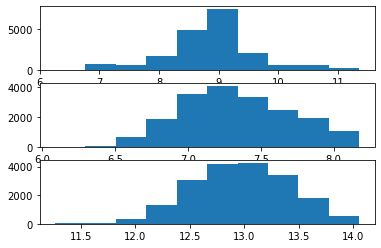

In [224]:
fig, axs = plt.subplots(3)
axs[0].hist('sqft_lot', data=data);
axs[1].hist('sqft_above', data=data);
axs[2].hist('price', data=data);